In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from pylab import rcParams
rcParams["figure.figsize"] = 20,10
import plotly.express as px                               
import statsmodels.api as sm                             
from sklearn.model_selection import train_test_split      
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
os.getcwd()

'/Users/rayyanshanawazmemon'

In [3]:
os.chdir('/Users/rayyanshanawazmemon/Downloads')

In [4]:
df = pd.read_csv('day.csv')
df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [5]:
df.shape

(731, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
df.duplicated().sum()

0

In [8]:
df.describe().T

count         mean          std        min          25%  \
instant     731.0   366.000000   211.165812   1.000000   183.500000   
season      731.0     2.496580     1.110807   1.000000     2.000000   
yr          731.0     0.500684     0.500342   0.000000     0.000000   
mnth        731.0     6.519836     3.451913   1.000000     4.000000   
holiday     731.0     0.028728     0.167155   0.000000     0.000000   
weekday     731.0     2.997264     2.004787   0.000000     1.000000   
workingday  731.0     0.683995     0.465233   0.000000     0.000000   
weathersit  731.0     1.395349     0.544894   1.000000     1.000000   
temp        731.0     0.495385     0.183051   0.059130     0.337083   
atemp       731.0     0.474354     0.162961   0.079070     0.337842   
hum         731.0     0.627894     0.142429   0.000000     0.520000   
windspeed   731.0     0.190486     0.077498   0.022392     0.134950   
casual      731.0   848.176471   686.622488   2.000000   315.500000   
registered  731.0  3656.172367  1560.256377  20.000000  2497.000000   
cnt         731.0  4504.348837  1937.211452  22.000000  3152.000000   

                    50%          75%          max  
instant      366.000000   548.500000   731.000000  
season         3.000000     3.000000     4.000000  
yr             1.000000     1.000000     1.000000  
mnth           7.000000    10.000000    12.000000  
holiday        0.000000     0.000000     1.000000  
weekday        3.000000     5.000000     6.000000  
workingday     1.000000     1.000000     1.000000  
weathersit     1.000000     2.000000     3.000000  
temp           0.498333     0.655417     0.861667  
atemp          0.486733     0.608602     0.840896  
hum            0.626667     0.730209     0.972500  
windspeed      0.180975     0.233214     0.507463  
casual       713.000000  1096.000000  3410.000000  
registered  3662.000000  4776.500000  6946.000000  
cnt         4548.000000  5956.000000  8714.000000

In [9]:
num_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

for i in num_cols:
    fig = px.box(data_frame=df, y=i, x='holiday')
    fig.show()


/var/folders/w_/bd06wfj92dnfz3y1yxp811d40000gn/T/ipykernel_42043/96157553.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

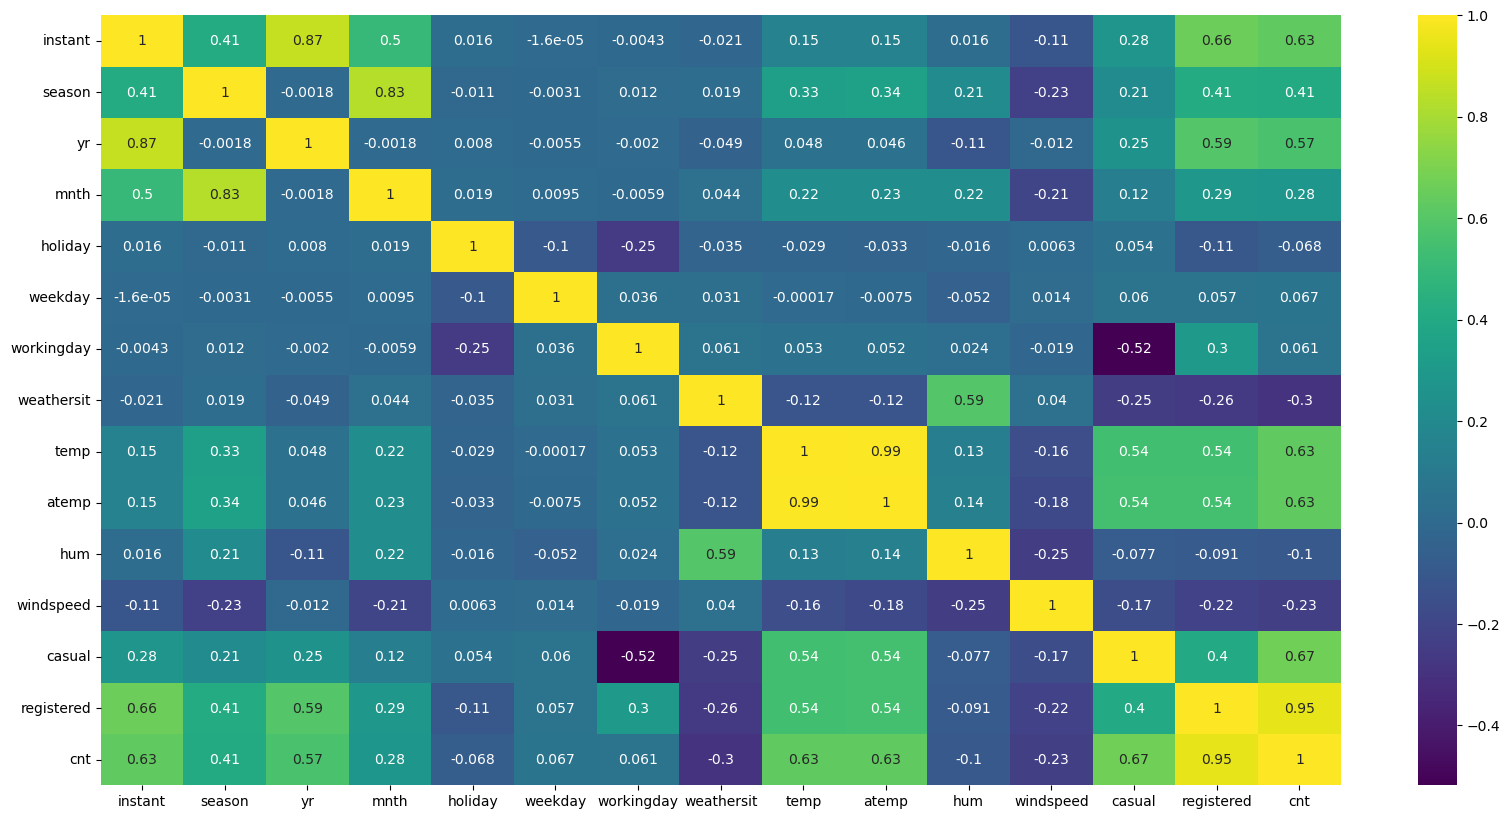

In [10]:
sns.heatmap(df.corr(),
           annot=True,
           cmap="viridis")

In [11]:
# pre prossesing data

In [12]:
#df = pd.get_dummies(df,drop_first=True)
#df.head()

In [13]:
df.drop(['dteday','instant','casual','registered','atemp'],axis=1,inplace=True)

<Axes: >

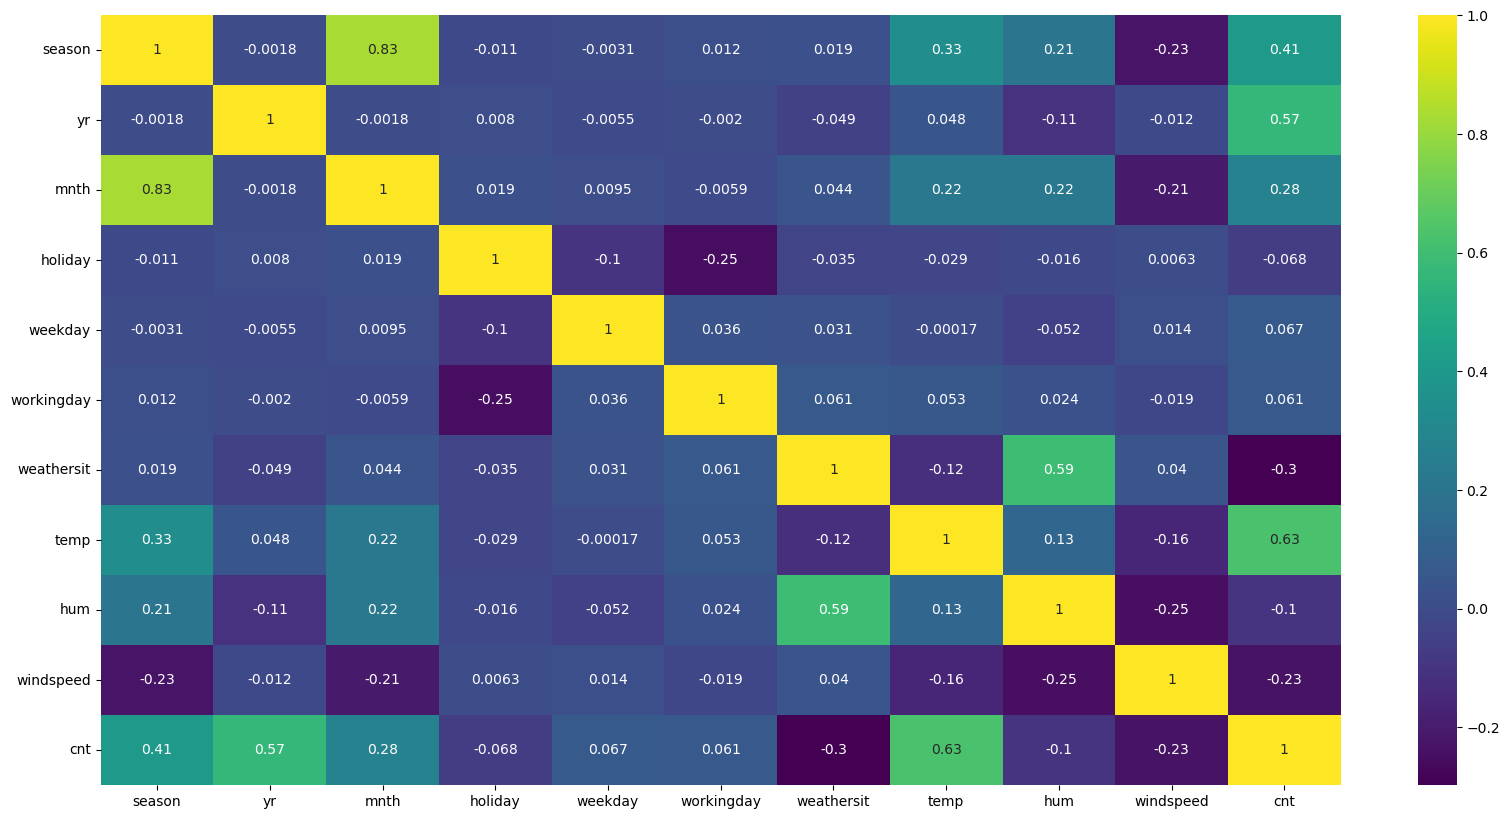

In [14]:
sns.heatmap(df.corr(),
           annot=True,
           cmap="viridis")

In [15]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

df.head()

season        yr      mnth   holiday   weekday  workingday  weathersit  \
0 -1.348213 -1.001369 -1.600161 -0.171981  1.498809   -1.471225    1.110427   
1 -1.348213 -1.001369 -1.600161 -0.171981 -1.496077   -1.471225    1.110427   
2 -1.348213 -1.001369 -1.600161 -0.171981 -0.996930    0.679706   -0.726048   
3 -1.348213 -1.001369 -1.600161 -0.171981 -0.497782    0.679706   -0.726048   
4 -1.348213 -1.001369 -1.600161 -0.171981  0.001366    0.679706   -0.726048   

       temp       hum  windspeed       cnt  
0 -0.826662  1.250171  -0.387892 -1.817953  
1 -0.721095  0.479113   0.749602 -1.912999  
2 -1.634657 -1.339274   0.746632 -1.629925  
3 -1.614780 -0.263182  -0.389829 -1.519898  
4 -1.467414 -1.341494  -0.046307 -1.500269

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
df_X =df.drop(['cnt'],axis=1)
vif = pd.DataFrame()
vif['Variable'] = df_X.columns
vif['VIF'] = [variance_inflation_factor(df_X, i) for i in range(df_X.shape[1])]

print(vif)

     Variable       VIF
0      season  3.541429
1          yr  1.020251
2        mnth  3.332130
3     holiday  1.081437
4     weekday  1.021463
5  workingday  1.076338
6  weathersit  1.741541
7        temp  1.215589
8         hum  1.905040
9   windspeed  1.165206


In [16]:
X= df.drop(['cnt'],axis=1)
Y=df['cnt']

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.50, random_state=50)

In [18]:
reg_model = LinearRegression()
reg_model.fit(X_train,Y_train)


LinearRegression()

In [19]:
print(f"Shape of Training set : {X_train.shape}")
print(f"Shape of test set : {X_test.shape}")

print("Percentage of classes in training set:")
print(Y_train.value_counts(normalize=True))

print("Percentage of classes in test set:")
print(Y_test.value_counts(normalize=True))

Shape of Training set : (365, 10)
Shape of test set : (366, 10)
Percentage of classes in training set:
 0.417200    0.005479
-1.456361    0.005479
 1.228715    0.005479
 1.077879    0.005479
 0.131026    0.005479
               ...   
 1.212701    0.002740
-1.224942    0.002740
-1.674349    0.002740
-0.335427    0.002740
 0.513796    0.002740
Name: cnt, Length: 359, dtype: float64
Percentage of classes in test set:
-0.209903    0.005464
 0.390339    0.005464
-0.666542    0.005464
 0.317504    0.005464
 1.049468    0.005464
               ...   
 0.927044    0.002732
-0.123121    0.002732
-0.162896    0.002732
-1.078756    0.002732
 0.082986    0.002732
Name: cnt, Length: 354, dtype: float64


In [20]:
prediction_train = reg_model.predict(X_train)
prediction_train

array([ 0.56144922,  1.95142886, -1.82354655,  1.5695067 ,  0.93252059,
       -0.83062523,  1.56837362,  0.90082607,  0.89352836, -0.21145161,
        0.41600586,  0.44188096, -1.45317288,  0.348794  , -0.20481181,
        0.43856341,  1.85283731,  0.59931924,  0.80600296,  1.58797057,
        0.30615298,  0.31323039, -0.09286021, -1.53098279, -0.40897901,
        1.71874203, -1.68270986, -0.97057365, -1.90366922,  0.67409689,
       -0.54064126, -0.64071969,  1.62693999, -1.81841582, -1.62396002,
       -0.74331212,  1.52750965, -0.73713361,  0.77335239, -1.89245328,
        0.10058424, -0.15409836, -0.67552965, -1.28857346, -1.18941749,
        0.94809613, -0.50489965, -0.36575361,  1.16823967, -0.04505617,
       -1.35559897,  0.55982688, -0.8377206 , -1.57031181,  1.30939346,
        0.97166716, -1.00802152,  0.87020607, -0.33203741, -0.76209926,
        0.42336315,  0.19863875,  0.02894858,  1.4337739 , -0.40116738,
       -0.23735863,  0.66645269, -0.31709586, -0.24924556,  0.87

In [21]:
print("MSE",mean_squared_error(prediction_train,Y_train).round(2))
print("RMSE",np.sqrt(mean_squared_error(prediction_train,Y_train)).round(2))
print("R-squared",r2_score(prediction_train,Y_train).round(2))

MSE 0.18
RMSE 0.42
R-squared 0.79


In [22]:
reg_model.predict(X_test)

array([-6.49131570e-01,  1.04211736e+00,  3.02420645e-01,  2.55168379e-01,
        5.87446995e-02, -9.55404077e-02,  3.68098931e-01,  1.73302779e+00,
       -3.12260774e-01,  8.83880815e-01,  1.10652303e+00, -3.30257843e-01,
        1.40289211e+00, -4.42028561e-01,  1.03318865e-02, -2.08724478e+00,
        1.00769907e-01, -3.62885061e-01,  1.19049027e-01, -1.26450473e+00,
        1.88110980e-01,  1.11172902e+00, -6.21715383e-01,  5.98835964e-01,
        1.12975496e+00, -9.53496998e-01,  9.61329346e-01,  2.49866001e-01,
        5.42974230e-02,  2.62915282e-01,  1.86563427e-01,  8.56235487e-01,
       -7.88171356e-01,  5.80645950e-01,  9.73387154e-01,  9.12921589e-01,
       -1.55844783e+00,  1.85792418e+00,  3.72370919e-01,  3.89536121e-01,
        3.19466480e-01,  4.28885038e-01,  9.10099351e-01,  5.82829159e-01,
        3.62621417e-01, -1.67639747e+00,  3.14730570e-02,  1.98321689e-01,
        5.97008129e-01, -1.22069727e-01, -6.97635461e-01,  4.36134377e-01,
       -2.86014818e-01, -

In [23]:
prediction_test = reg_model.predict(X_test)
prediction_test

array([-6.49131570e-01,  1.04211736e+00,  3.02420645e-01,  2.55168379e-01,
        5.87446995e-02, -9.55404077e-02,  3.68098931e-01,  1.73302779e+00,
       -3.12260774e-01,  8.83880815e-01,  1.10652303e+00, -3.30257843e-01,
        1.40289211e+00, -4.42028561e-01,  1.03318865e-02, -2.08724478e+00,
        1.00769907e-01, -3.62885061e-01,  1.19049027e-01, -1.26450473e+00,
        1.88110980e-01,  1.11172902e+00, -6.21715383e-01,  5.98835964e-01,
        1.12975496e+00, -9.53496998e-01,  9.61329346e-01,  2.49866001e-01,
        5.42974230e-02,  2.62915282e-01,  1.86563427e-01,  8.56235487e-01,
       -7.88171356e-01,  5.80645950e-01,  9.73387154e-01,  9.12921589e-01,
       -1.55844783e+00,  1.85792418e+00,  3.72370919e-01,  3.89536121e-01,
        3.19466480e-01,  4.28885038e-01,  9.10099351e-01,  5.82829159e-01,
        3.62621417e-01, -1.67639747e+00,  3.14730570e-02,  1.98321689e-01,
        5.97008129e-01, -1.22069727e-01, -6.97635461e-01,  4.36134377e-01,
       -2.86014818e-01, -

In [24]:
print("MSE",mean_squared_error(prediction_test,Y_test).round(2))
print("RMSE",np.sqrt(mean_squared_error(prediction_test,Y_test)).round(2))
print("R-squared",r2_score(prediction_test,Y_test).round(2))

MSE 0.23
RMSE 0.48
R-squared 0.71


In [25]:
reg_model.score(X_train,Y_train)

0.8274877646810395

In [26]:
reg_model.score(X_test,Y_test)

0.7604319715290587

In [27]:
Y_train_pred = reg_model.predict(X_train)
Y_test_pred = reg_model.predict(X_test)

In [28]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

In [29]:
mean_absolute_error(Y_train,Y_train_pred)

0.3186038920222727

In [30]:
mean_absolute_error(Y_test,Y_test_pred)

0.3519401484411687

In [31]:
mean_squared_error(Y_test,Y_test_pred,squared=False)

0.480236814476897

In [32]:
mean_absolute_percentage_error(Y_train,Y_train_pred)

1.9632754950760263

In [33]:
print("MSE",mean_squared_error(prediction_train,Y_train).round(2))
print("RMSE",np.sqrt(mean_squared_error(prediction_train,Y_train)).round(2))
print("R-squared",r2_score(prediction_train,Y_train).round(2))

MSE 0.18
RMSE 0.42
R-squared 0.79


In [34]:
print("MSE",mean_squared_error(prediction_test,Y_test).round(2))
print("RMSE",np.sqrt(mean_squared_error(prediction_test,Y_test)).round(2))
print("R-squared",r2_score(prediction_test,Y_test).round(2))

MSE 0.23
RMSE 0.48
R-squared 0.71


In [35]:
columns = (['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed'])

In [36]:
mx_scale = MinMaxScaler()
X_scaled = pd.DataFrame(mx_scale.fit_transform(X),columns=columns)

In [37]:
X_train,X_test,Y_train,Y_test = train_test_split(X_scaled,
                                               Y,
                                               random_state=50,
                                               test_size=0.50)

In [38]:
lr_full_model = LinearRegression()

In [39]:
lr_full_model.fit(X_train,Y_train)

LinearRegression()

In [40]:
lr_full_model.score(X_test[columns],Y_test)

0.7604319715290586

In [41]:
lr_full_model.score(X_train[columns],Y_train)

0.8274877646810395

In [42]:
lr_full_model.intercept_

-1.2455152939854242

In [43]:
lr_full_model.score(X_train,Y_train)

0.8274877646810395

In [44]:
lr_full_model.score(X_test,Y_test)

0.7604319715290586

In [45]:
Y_train_pred = lr_full_model.predict(X_train)
Y_test_pred = lr_full_model.predict(X_test)

In [46]:
mean_absolute_error(Y_train,Y_train_pred)

0.3186038920222727

In [47]:
mean_absolute_error(Y_test,Y_test_pred)

0.3519401484411687

In [48]:
mean_squared_error(Y_train,Y_train_pred,squared=False)

0.4227729371299658

In [49]:
mean_absolute_percentage_error(Y_train,Y_train_pred)

1.9632754950760287

In [50]:
mean_absolute_percentage_error(Y_test,Y_test_pred)

2.2885357743863133

In [51]:
reg_model = LinearRegression()
reg_model.fit(X_train,Y_train)

LinearRegression()

In [52]:
prediction_train = reg_model.predict(X_train)
prediction_train

array([ 0.56144922,  1.95142886, -1.82354655,  1.5695067 ,  0.93252059,
       -0.83062523,  1.56837362,  0.90082607,  0.89352836, -0.21145161,
        0.41600586,  0.44188096, -1.45317288,  0.348794  , -0.20481181,
        0.43856341,  1.85283731,  0.59931924,  0.80600296,  1.58797057,
        0.30615298,  0.31323039, -0.09286021, -1.53098279, -0.40897901,
        1.71874203, -1.68270986, -0.97057365, -1.90366922,  0.67409689,
       -0.54064126, -0.64071969,  1.62693999, -1.81841582, -1.62396002,
       -0.74331212,  1.52750965, -0.73713361,  0.77335239, -1.89245328,
        0.10058424, -0.15409836, -0.67552965, -1.28857346, -1.18941749,
        0.94809613, -0.50489965, -0.36575361,  1.16823967, -0.04505617,
       -1.35559897,  0.55982688, -0.8377206 , -1.57031181,  1.30939346,
        0.97166716, -1.00802152,  0.87020607, -0.33203741, -0.76209926,
        0.42336315,  0.19863875,  0.02894858,  1.4337739 , -0.40116738,
       -0.23735863,  0.66645269, -0.31709586, -0.24924556,  0.87

In [53]:
print("MSE",mean_squared_error(prediction_train,Y_train).round(2))
print("RMSE",np.sqrt(mean_squared_error(prediction_train,Y_train)).round(2))
print("R-squared",r2_score(prediction_train,Y_train).round(2))

MSE 0.18
RMSE 0.42
R-squared 0.79


In [54]:
reg_model.predict(X_test)

array([-6.49131570e-01,  1.04211736e+00,  3.02420645e-01,  2.55168379e-01,
        5.87446995e-02, -9.55404077e-02,  3.68098931e-01,  1.73302779e+00,
       -3.12260774e-01,  8.83880815e-01,  1.10652303e+00, -3.30257843e-01,
        1.40289211e+00, -4.42028561e-01,  1.03318865e-02, -2.08724478e+00,
        1.00769907e-01, -3.62885061e-01,  1.19049027e-01, -1.26450473e+00,
        1.88110980e-01,  1.11172902e+00, -6.21715383e-01,  5.98835964e-01,
        1.12975496e+00, -9.53496998e-01,  9.61329346e-01,  2.49866001e-01,
        5.42974230e-02,  2.62915282e-01,  1.86563427e-01,  8.56235487e-01,
       -7.88171356e-01,  5.80645950e-01,  9.73387154e-01,  9.12921589e-01,
       -1.55844783e+00,  1.85792418e+00,  3.72370919e-01,  3.89536121e-01,
        3.19466480e-01,  4.28885038e-01,  9.10099351e-01,  5.82829159e-01,
        3.62621417e-01, -1.67639747e+00,  3.14730570e-02,  1.98321689e-01,
        5.97008129e-01, -1.22069727e-01, -6.97635461e-01,  4.36134377e-01,
       -2.86014818e-01, -

In [55]:
prediction_test = reg_model.predict(X_test)
prediction_test

array([-6.49131570e-01,  1.04211736e+00,  3.02420645e-01,  2.55168379e-01,
        5.87446995e-02, -9.55404077e-02,  3.68098931e-01,  1.73302779e+00,
       -3.12260774e-01,  8.83880815e-01,  1.10652303e+00, -3.30257843e-01,
        1.40289211e+00, -4.42028561e-01,  1.03318865e-02, -2.08724478e+00,
        1.00769907e-01, -3.62885061e-01,  1.19049027e-01, -1.26450473e+00,
        1.88110980e-01,  1.11172902e+00, -6.21715383e-01,  5.98835964e-01,
        1.12975496e+00, -9.53496998e-01,  9.61329346e-01,  2.49866001e-01,
        5.42974230e-02,  2.62915282e-01,  1.86563427e-01,  8.56235487e-01,
       -7.88171356e-01,  5.80645950e-01,  9.73387154e-01,  9.12921589e-01,
       -1.55844783e+00,  1.85792418e+00,  3.72370919e-01,  3.89536121e-01,
        3.19466480e-01,  4.28885038e-01,  9.10099351e-01,  5.82829159e-01,
        3.62621417e-01, -1.67639747e+00,  3.14730570e-02,  1.98321689e-01,
        5.97008129e-01, -1.22069727e-01, -6.97635461e-01,  4.36134377e-01,
       -2.86014818e-01, -

In [56]:
print("MSE",mean_squared_error(prediction_test,Y_test).round(2))
print("RMSE",np.sqrt(mean_squared_error(prediction_test,Y_test)).round(2))
print("R-squared",r2_score(prediction_test,Y_test).round(2))

MSE 0.23
RMSE 0.48
R-squared 0.71


In [57]:
# desion tree model

In [58]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import os
import plotly.express as px 

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score,
    classification_report,
    confusion_matrix, 
    precision_recall_curve,
    roc_auc_score, 
    roc_curve)
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error


In [59]:
os.getcwd()

'/Users/rayyanshanawazmemon/Downloads'

In [60]:
os.chdir('/Users/rayyanshanawazmemon/Downloads')

In [61]:
df1 = pd.read_csv('day.csv')
df1.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [62]:
df1.shape

(731, 16)

In [63]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [64]:
df1.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [65]:
df1.duplicated().sum()

0

In [66]:
df1.describe().T

count         mean          std        min          25%  \
instant     731.0   366.000000   211.165812   1.000000   183.500000   
season      731.0     2.496580     1.110807   1.000000     2.000000   
yr          731.0     0.500684     0.500342   0.000000     0.000000   
mnth        731.0     6.519836     3.451913   1.000000     4.000000   
holiday     731.0     0.028728     0.167155   0.000000     0.000000   
weekday     731.0     2.997264     2.004787   0.000000     1.000000   
workingday  731.0     0.683995     0.465233   0.000000     0.000000   
weathersit  731.0     1.395349     0.544894   1.000000     1.000000   
temp        731.0     0.495385     0.183051   0.059130     0.337083   
atemp       731.0     0.474354     0.162961   0.079070     0.337842   
hum         731.0     0.627894     0.142429   0.000000     0.520000   
windspeed   731.0     0.190486     0.077498   0.022392     0.134950   
casual      731.0   848.176471   686.622488   2.000000   315.500000   
registered  731.0  3656.172367  1560.256377  20.000000  2497.000000   
cnt         731.0  4504.348837  1937.211452  22.000000  3152.000000   

                    50%          75%          max  
instant      366.000000   548.500000   731.000000  
season         3.000000     3.000000     4.000000  
yr             1.000000     1.000000     1.000000  
mnth           7.000000    10.000000    12.000000  
holiday        0.000000     0.000000     1.000000  
weekday        3.000000     5.000000     6.000000  
workingday     1.000000     1.000000     1.000000  
weathersit     1.000000     2.000000     3.000000  
temp           0.498333     0.655417     0.861667  
atemp          0.486733     0.608602     0.840896  
hum            0.626667     0.730209     0.972500  
windspeed      0.180975     0.233214     0.507463  
casual       713.000000  1096.000000  3410.000000  
registered  3662.000000  4776.500000  6946.000000  
cnt         4548.000000  5956.000000  8714.000000

In [67]:
# univariate analysis

In [68]:
def univariate_numerical_analysis(df1, column, figsize=(8,6), bins = 10):
    # Measures of central tendency
    print("Measures of central tendency for", column)
    print("Mean:", df1[column].mean())
    print("Median:", df1[column].median())
    print("Mode:", df1[column].mode().values[0])
    print()

    # Measures of dispersion
    print("Measures of dispersion for", column)
    print("Standard Deviation:", df1[column].std())
    print("Range:", df1[column].max() - df1[column].min())
    print()
    
    # Plot the histogram
    _, ax_hist = plt.subplots(
        nrows=1,  # Number of rows of the subplot grid=1
        figsize=figsize,
    )  # creating the 2 subplots
    sns.histplot(data=df1, x=column, kde=False, ax=ax_hist, bins=bins)
    ax_hist.axvline(
        df1[column].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist.axvline(
        df1[column].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [69]:
def univariate_categorical_analysis(df1, column):

    print("Percentage distribution for", column)
    print(df1[column].value_counts(normalize=True) * 100)
    print()
    
    plt.figure(figsize=(8, 6))
    df1[column].value_counts().plot(kind='bar', color='skyblue')
    plt.title("Bar Plot: " + column)
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

Measures of central tendency for temp
Mean: 0.495384788508892
Median: 0.498333
Mode: 0.265833

Measures of dispersion for temp
Standard Deviation: 0.18305099611148867
Range: 0.8025365999999999



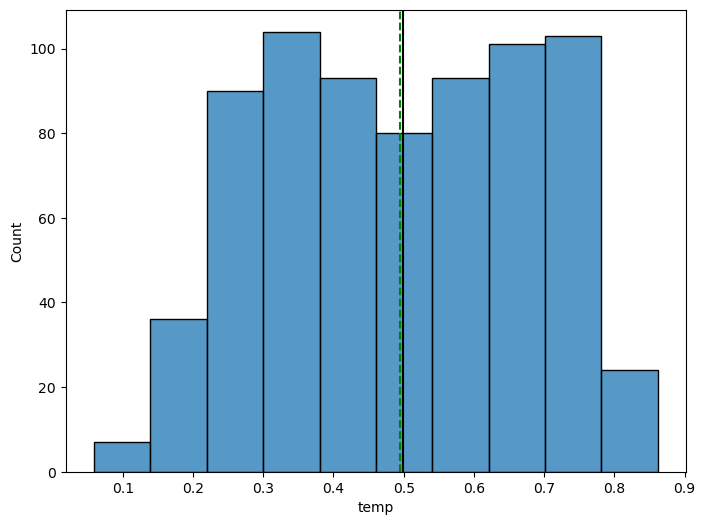

In [70]:
univariate_numerical_analysis(df1, 'temp')

Measures of central tendency for atemp
Mean: 0.47435398864569084
Median: 0.486733
Mode: 0.654688

Measures of dispersion for atemp
Standard Deviation: 0.16296117838631127
Range: 0.7618264



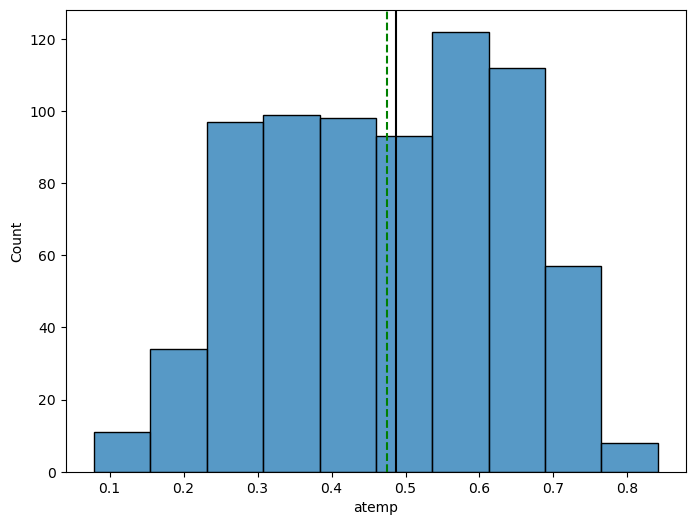

In [71]:
univariate_numerical_analysis(df1, 'atemp')

Measures of central tendency for hum
Mean: 0.6278940629274967
Median: 0.626667
Mode: 0.613333

Measures of dispersion for hum
Standard Deviation: 0.14242909513835394
Range: 0.9725



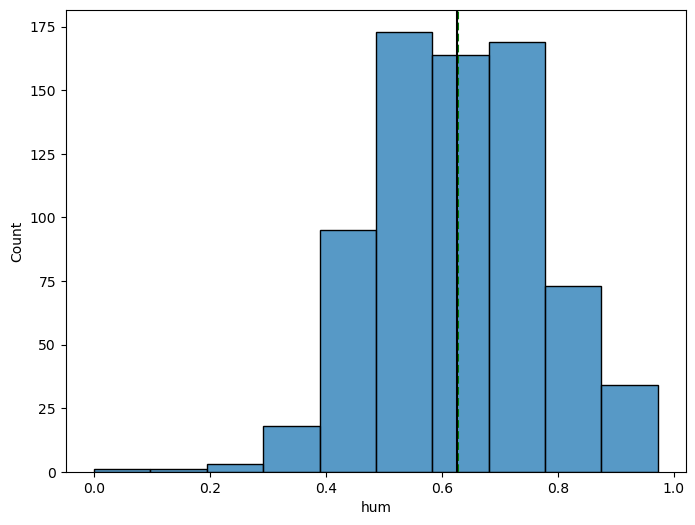

In [72]:
univariate_numerical_analysis(df1, 'hum')

Measures of central tendency for windspeed
Mean: 0.190486211627907
Median: 0.180975
Mode: 0.10635

Measures of dispersion for windspeed
Standard Deviation: 0.07749787068166943
Range: 0.4850713



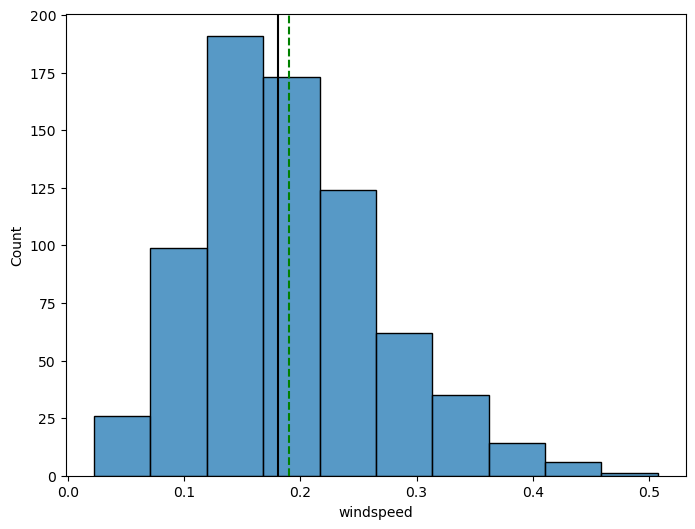

In [73]:
univariate_numerical_analysis(df1, 'windspeed')

Percentage distribution for season
3    25.718194
2    25.170999
1    24.760602
4    24.350205
Name: season, dtype: float64



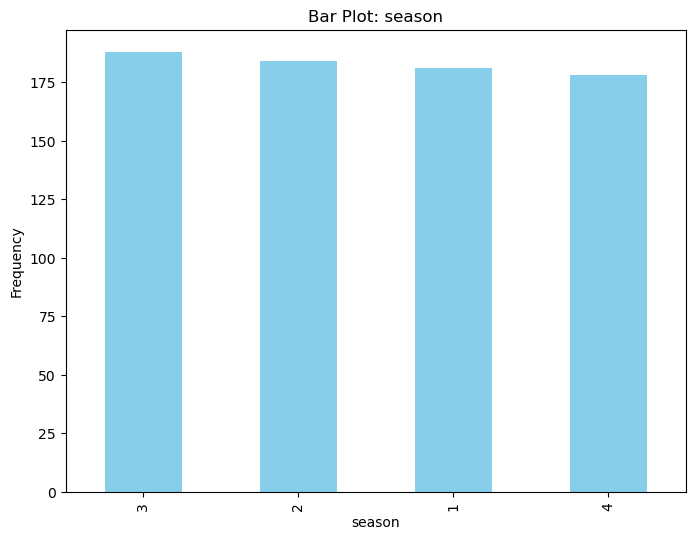

In [74]:
univariate_categorical_analysis(df1, 'season')

Percentage distribution for yr
1    50.068399
0    49.931601
Name: yr, dtype: float64



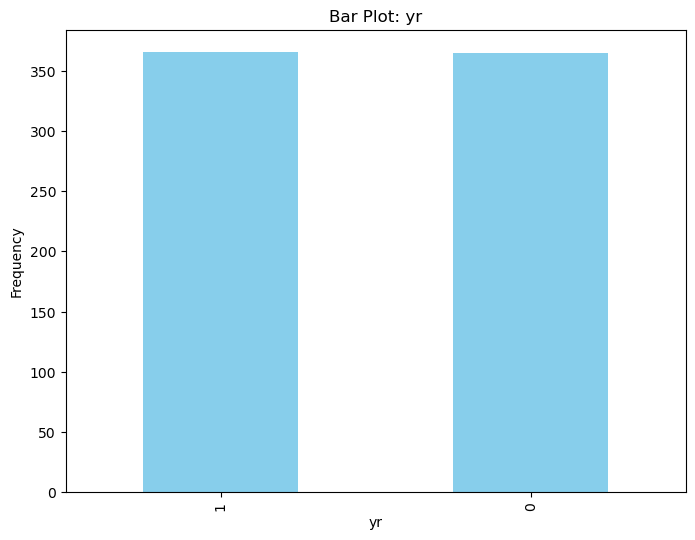

In [75]:
univariate_categorical_analysis(df1, 'yr') # 0 for 2011 and 1 for 2012

Percentage distribution for workingday
1    68.399453
0    31.600547
Name: workingday, dtype: float64



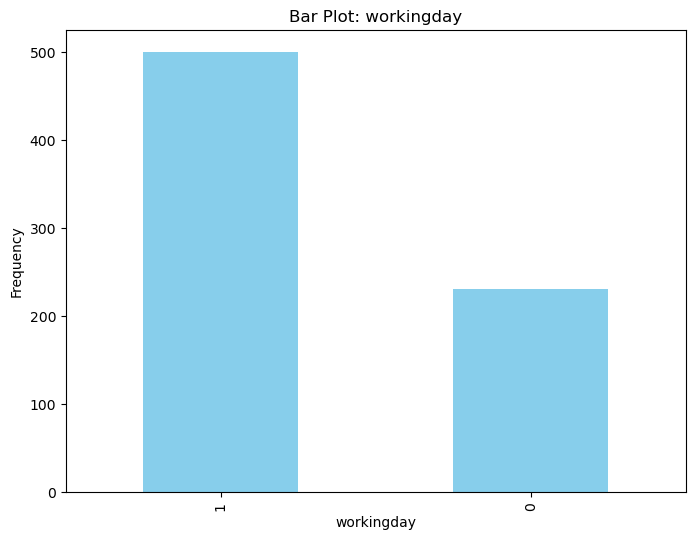

In [76]:
univariate_categorical_analysis(df1, 'workingday')

Percentage distribution for weathersit
1    63.337893
2    33.789330
3     2.872777
Name: weathersit, dtype: float64



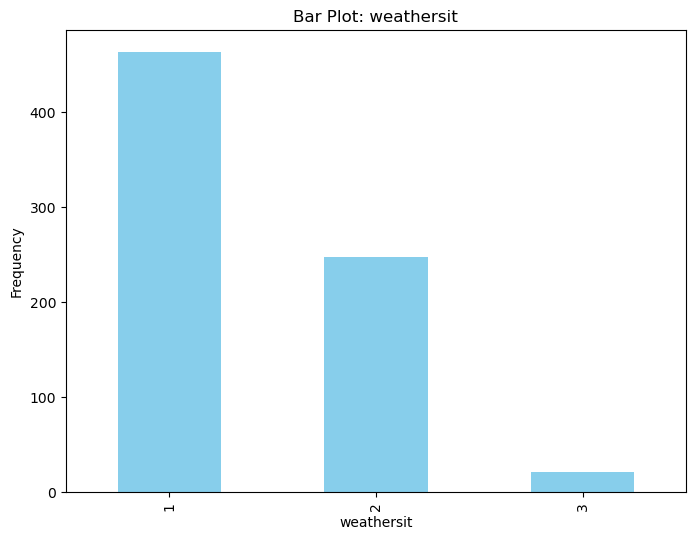

In [77]:
univariate_categorical_analysis(df1, 'weathersit')

In [78]:
# bivariate analysis

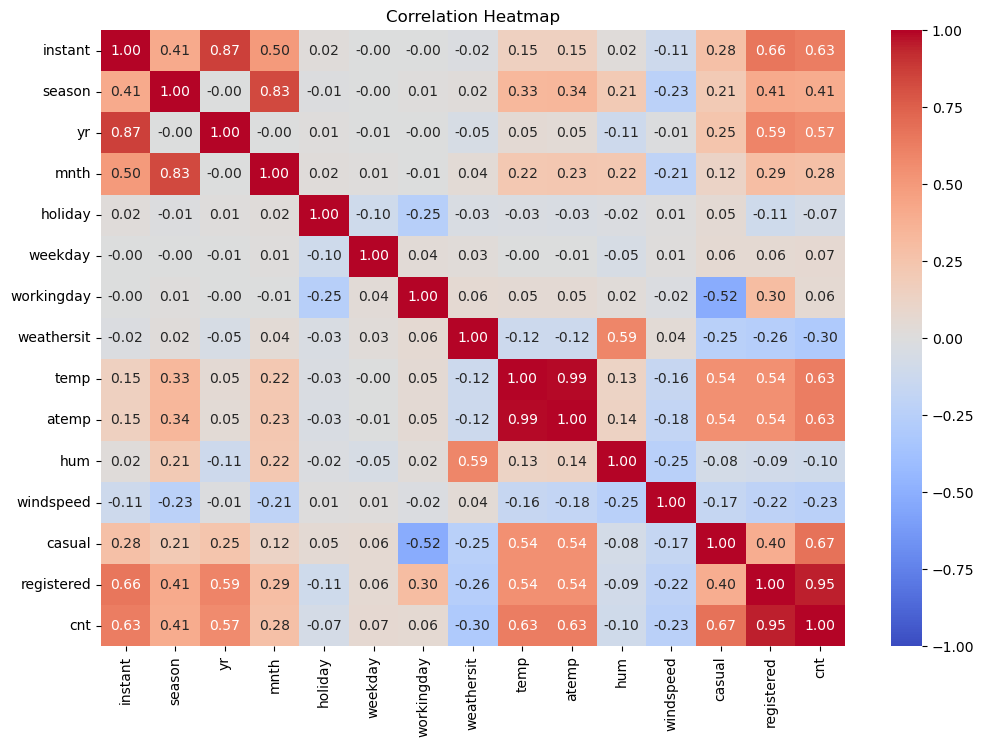

In [79]:
# Calculate the correlation matrix
correlation_matrix = df1.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

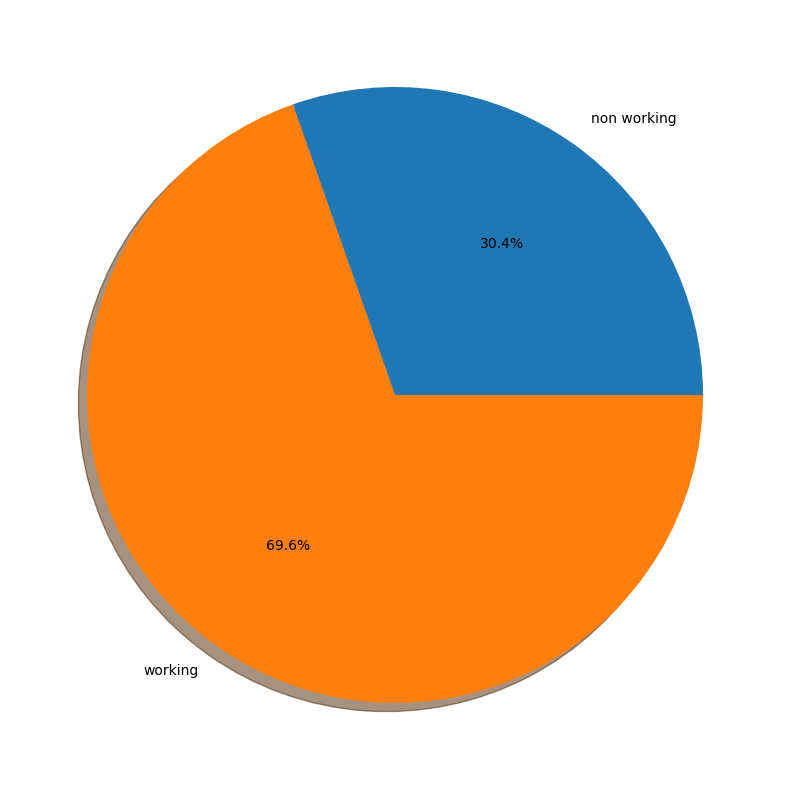

In [80]:
c=df1.groupby('workingday')['cnt'].sum().reset_index()
c1=c.sort_values(by='cnt')
y=c1['cnt']
labels=['non working', 'working']
plt.pie(y,labels=labels,shadow=True,autopct='%1.1f%%')
plt.show()

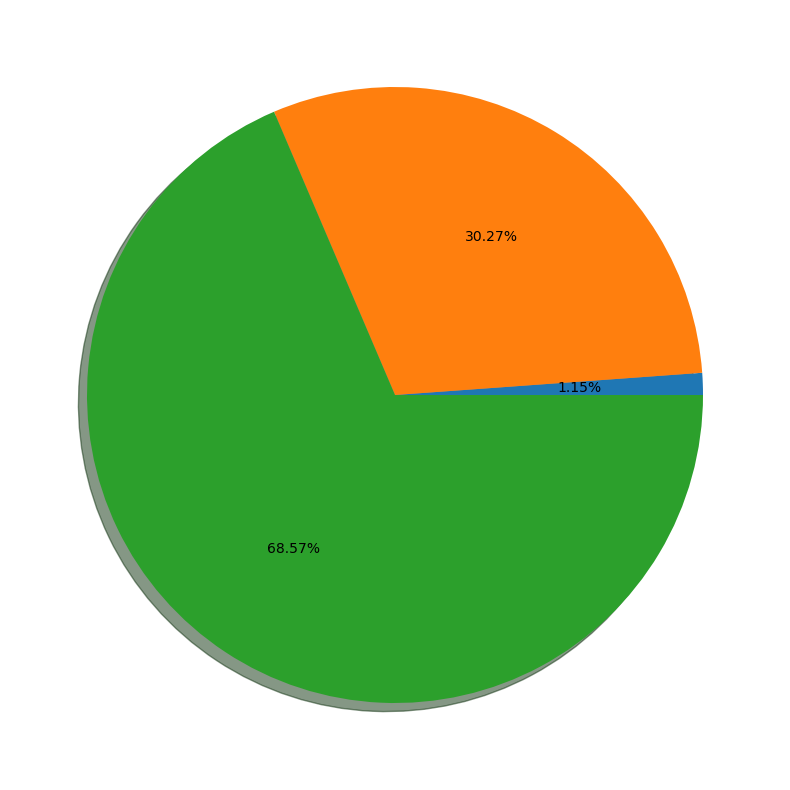

In [81]:
# Grouping the data by 'weathersit' and calculating the sum of bike rentals ('cnt')
c = df1.groupby('weathersit')['cnt'].sum().reset_index()

# Sorting the values based on the total bike rentals
c1 = c.sort_values(by='cnt')

# Extracting the counts and labels for the pie chart
y = c1['cnt']
labels = [4, 3, 2, 1]  # Assuming these are the weather situation labels

# Creating a pie chart
plt.pie(y, shadow=True, autopct='%1.2f%%')

# Displaying the pie chart
plt.show()


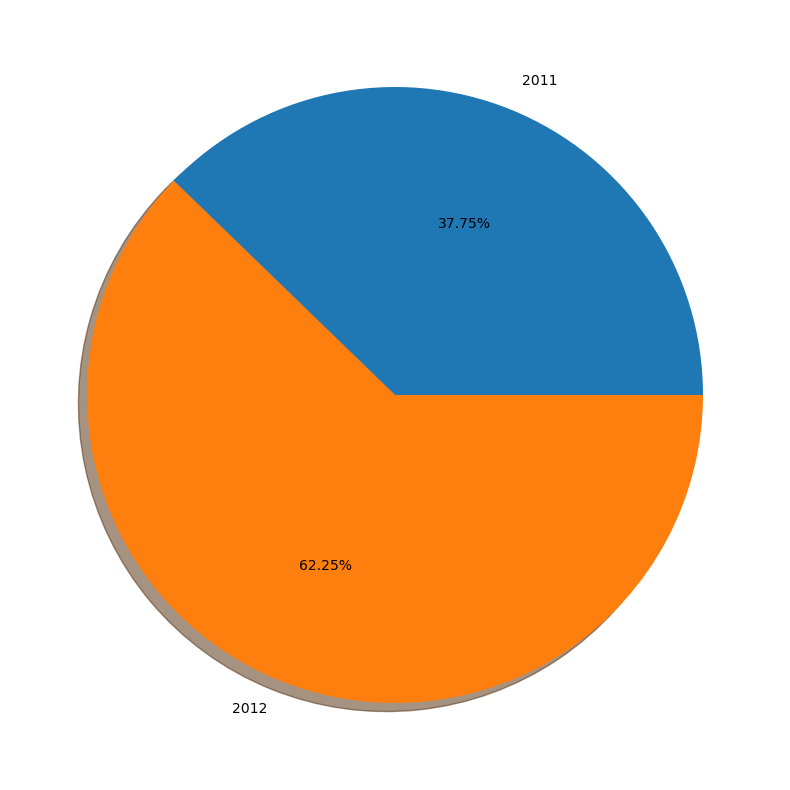

In [82]:
c=df1.groupby('yr')['cnt'].sum().reset_index()
c1=c.sort_values(by='cnt')
y=c1['cnt']
labels=[2011, 2012]
plt.pie(y,labels=labels,shadow=True,autopct='%1.2f%%')
plt.show()

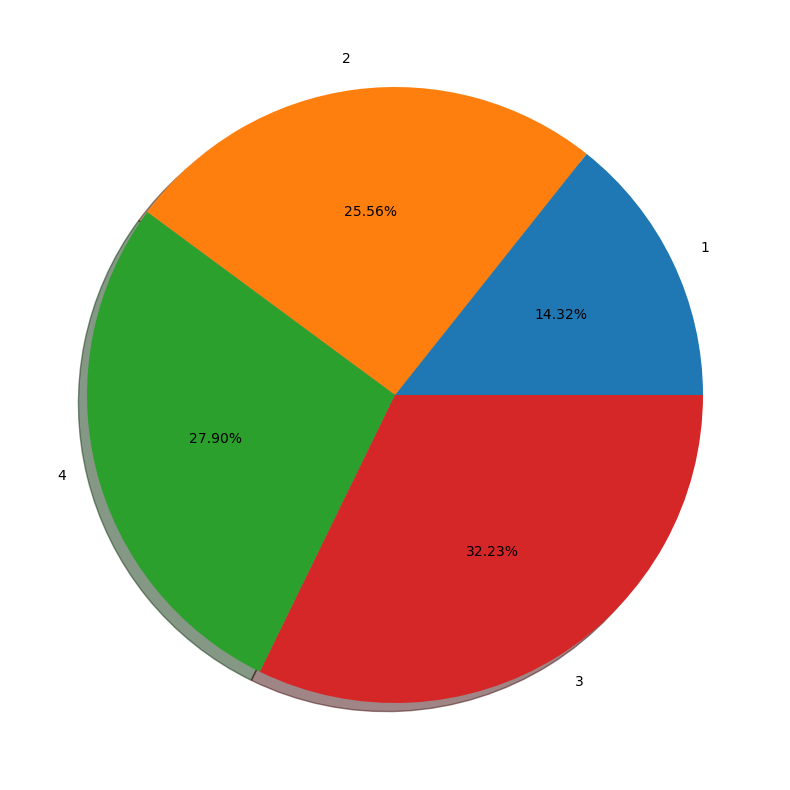

In [83]:
c=df1.groupby('season')['cnt'].sum().reset_index()
c1=c.sort_values(by='cnt')
y=c1['cnt']
labels=[1,2,4,3]
plt.pie(y,labels=labels,shadow=True,autopct='%1.2f%%')
plt.show()

In [84]:
df1.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [85]:
df1.drop(["instant", "dteday", "casual", "registered", "atemp"], axis=1, inplace=True)
df1.head()

season  yr  mnth  holiday  weekday  workingday  weathersit      temp  \
0       1   0     1        0        6           0           2  0.344167   
1       1   0     1        0        0           0           2  0.363478   
2       1   0     1        0        1           1           1  0.196364   
3       1   0     1        0        2           1           1  0.200000   
4       1   0     1        0        3           1           1  0.226957   

        hum  windspeed   cnt  
0  0.805833   0.160446   985  
1  0.696087   0.248539   801  
2  0.437273   0.248309  1349  
3  0.590435   0.160296  1562  
4  0.436957   0.186900  1600

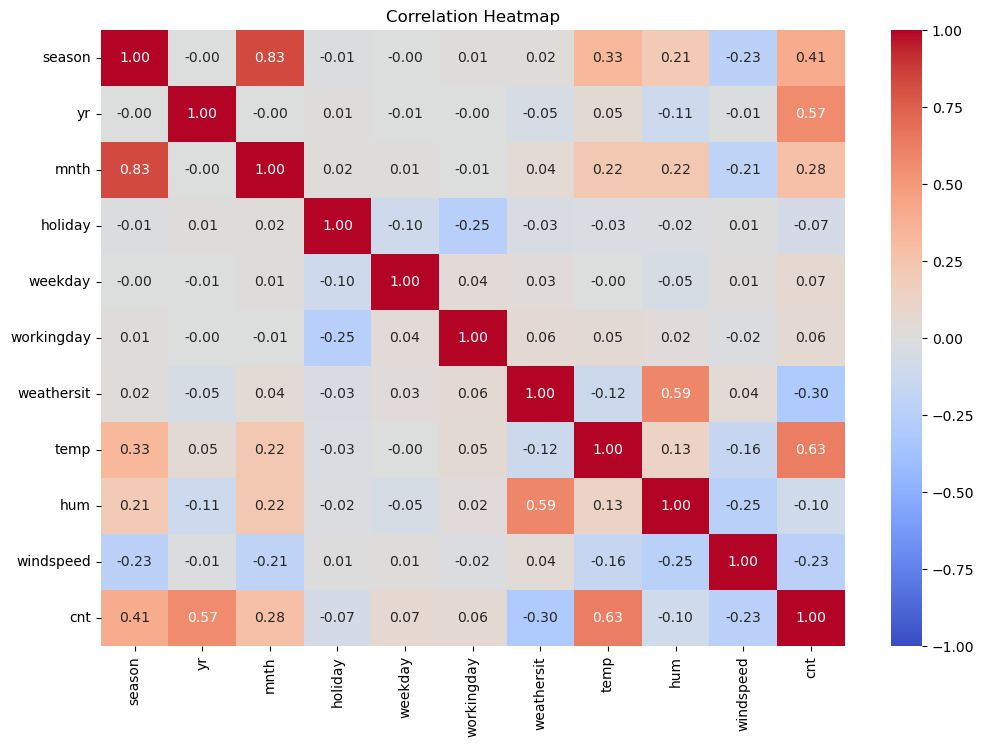

In [86]:
# Calculate the correlation matrix
correlation_matrix = df1.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [87]:
categorical_columns = ['season']
df=pd.get_dummies(df1,columns=categorical_columns, drop_first=True)

df.head()

yr  mnth  holiday  weekday  workingday  weathersit      temp       hum  \
0   0     1        0        6           0           2  0.344167  0.805833   
1   0     1        0        0           0           2  0.363478  0.696087   
2   0     1        0        1           1           1  0.196364  0.437273   
3   0     1        0        2           1           1  0.200000  0.590435   
4   0     1        0        3           1           1  0.226957  0.436957   

   windspeed   cnt  season_2  season_3  season_4  
0   0.160446   985         0         0         0  
1   0.248539   801         0         0         0  
2   0.248309  1349         0         0         0  
3   0.160296  1562         0         0         0  
4   0.186900  1600         0         0         0

In [88]:
X = df.drop(["cnt"], axis=1)
Y = df["cnt"]

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=30
)

In [89]:
print("Training set Shape: ", X_train.shape)
print("Test set Shape: ", X_test.shape)

print("Training set distribution:")
print(f'Avg: {y_train.mean()}, SD: {y_train.std()}')

print("Test set distribution:")
print(f'Avg: {y_test.mean()}, SD: {y_test.std()}')

Training set Shape:  (511, 12)
Test set Shape:  (220, 12)
Training set distribution:
Avg: 4460.743639921722, SD: 1958.4396937742679
Test set distribution:
Avg: 4605.631818181818, SD: 1887.484711211203


In [90]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [91]:
model.score(X_train, y_train) # r2 score

1.0

In [92]:
model.score(X_test, y_test) # r2 score

0.743957097742757

In [93]:
# function to compute adjusted R-squared -- extra step

def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

def calc_metric_score(X, y_train, y_pred):
    # Error Metrics - low
    print("mean absolute error:",mean_absolute_error(y_train,y_pred))
    print("root mean squared error:",np.sqrt(mean_squared_error(y_train,y_pred)))

    # Accuracy metrics - high
    print("r2-score:",r2_score(y_train,y_pred))
    print("adj-r2 score:", adj_r2_score(X, y_train, y_pred))

In [94]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Choose the type of regressor.
clf = DecisionTreeRegressor()

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(3, 10, 1),
    "max_leaf_nodes": [50, 75, 150, 250, 300],
    "min_samples_split": [10, 20, 30, 50, 70, 100]
}

# Run the grid search
_grid_obj = GridSearchCV(clf, parameters, cv=5, verbose = 1)
_grid_obj = _grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
grid_clf = _grid_obj.best_estimator_

print(grid_clf)

Fitting 5 folds for each of 210 candidates, totalling 1050 fits
DecisionTreeRegressor(max_depth=8, max_leaf_nodes=50, min_samples_split=30)


In [95]:
# Fit the best algorithm to the data.
grid_clf.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, max_leaf_nodes=50, min_samples_split=30)

In [96]:
calc_metric_score(X_train, y_train, grid_clf.predict(X_train))

mean absolute error: 461.23542784817494
root mean squared error: 647.2454257623041
r2-score: 0.8905619621035106
adj-r2 score: 0.8879249009493783


In [97]:
calc_metric_score(X_test, y_test, grid_clf.predict(X_test))

mean absolute error: 642.182238776288
root mean squared error: 917.5134196395563
r2-score: 0.7626241510244876
adj-r2 score: 0.7488632322432984


In [98]:
# Choose the type of regressor.
clf = DecisionTreeRegressor()

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(3, 10, 1),
    "max_leaf_nodes": [50, 75, 150, 250, 300],
    "min_samples_split": [10, 20, 30, 50, 70, 100]
}

# Run the randomized search
_grid_obj = RandomizedSearchCV(clf, parameters, cv=5, n_iter = 50, verbose = 1)
_grid_obj = _grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
random_clf = _grid_obj.best_estimator_

print(random_clf)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
DecisionTreeRegressor(max_depth=8, max_leaf_nodes=300, min_samples_split=30)


In [99]:
# Fit the best algorithm to the data.
random_clf.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, max_leaf_nodes=300, min_samples_split=30)

In [100]:
calc_metric_score(X_train, y_train, random_clf.predict(X_train))

mean absolute error: 461.23542784817494
root mean squared error: 647.2454257623041
r2-score: 0.8905619621035106
adj-r2 score: 0.8879249009493783


In [101]:
calc_metric_score(X_test, y_test, random_clf.predict(X_test))

mean absolute error: 642.182238776288
root mean squared error: 917.5134196395563
r2-score: 0.7626241510244876
adj-r2 score: 0.7488632322432984


In [102]:
clf = DecisionTreeRegressor()
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [103]:
pd.DataFrame(path)

ccp_alphas    impurities
0    0.000000e+00  0.000000e+00
1    9.784736e-04  9.784736e-04
2    9.784736e-04  1.956947e-03
3    9.784736e-04  2.935421e-03
4    3.913894e-03  6.849315e-03
..            ...           ...
471  9.926380e+04  9.745222e+05
472  1.905708e+05  1.165093e+06
473  3.014349e+05  1.466528e+06
474  7.688031e+05  2.235331e+06
475  1.592649e+06  3.827980e+06

[476 rows x 2 columns]

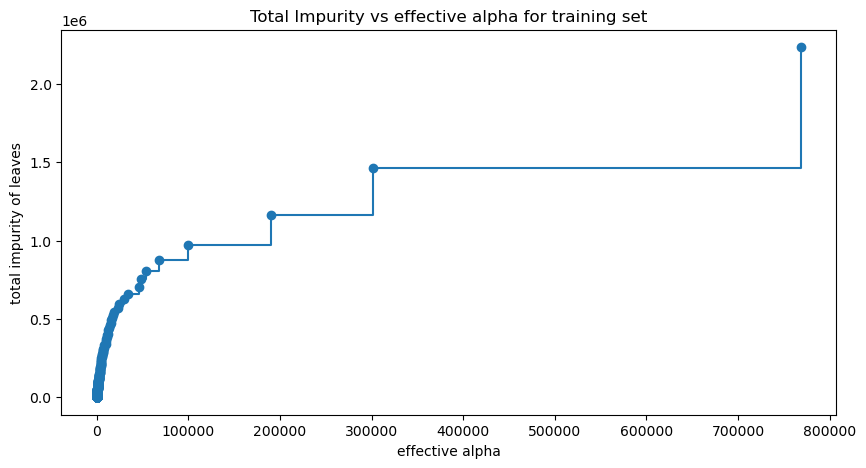

In [104]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [105]:
# Please note that this step may take significant amount of time (1-2 hrs)
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(
        ccp_alpha=ccp_alpha
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 1592649.2417958742


In [106]:
r_squared_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    r2_train = r2_score(y_train, pred_train)
    r_squared_train.append(r2_train)

In [107]:
r_squared_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    r2_test = r2_score(y_test, pred_test)
    r_squared_test.append(r2_test)

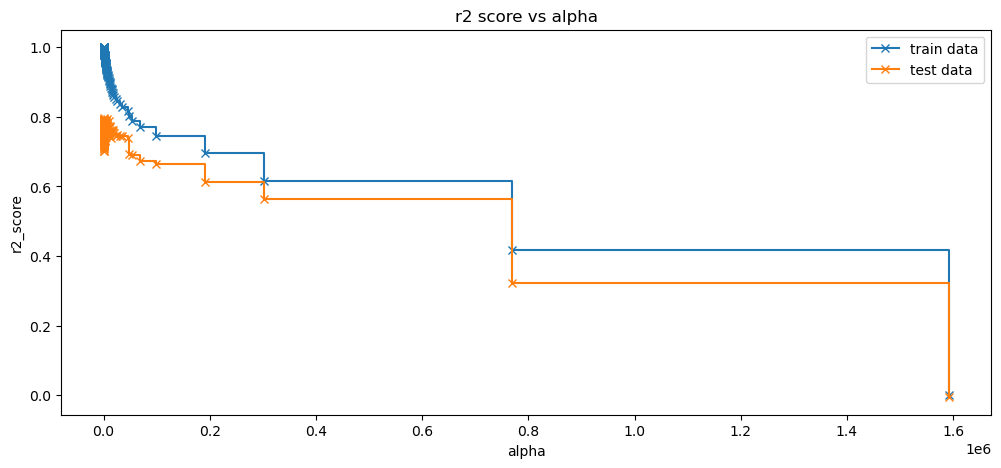

In [108]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("r2_score")
ax.set_title("r2 score vs alpha")
ax.plot(ccp_alphas, r_squared_train, marker="x", label="train data", drawstyle="steps-post")
ax.plot(ccp_alphas, r_squared_test, marker="x", label="test data", drawstyle="steps-post")
ax.legend()
plt.show()

In [109]:
# creating the model where we get highest train and test r2 score
index_best_model = np.argmax(r_squared_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeRegressor(ccp_alpha=626.0327304789646)


In [110]:
calc_metric_score(X_train, y_train, best_model.predict(X_train))

mean absolute error: 143.97969007509124
root mean squared error: 190.47178122270086
r2-score: 0.9905225477574672
adj-r2 score: 0.9902941754142736


In [111]:
calc_metric_score(X_test, y_test, best_model.predict(X_test))

mean absolute error: 601.6564244215381
root mean squared error: 846.5627152940605
r2-score: 0.7979169186675054
adj-r2 score: 0.786201957430839


finalizing the model

In [112]:
# training performance comparison

models_train_comp_df = pd.DataFrame(
    [
        [np.sqrt(mean_squared_error(y_train, grid_clf.predict(X_train))), 
         r2_score(y_train, grid_clf.predict(X_train)),
        adj_r2_score(X_train, y_train, grid_clf.predict(X_train))],
        
         [np.sqrt(mean_squared_error(y_train, random_clf.predict(X_train))), 
         r2_score(y_train, random_clf.predict(X_train)),
        adj_r2_score(X_train, y_train, random_clf.predict(X_train))],
        
         [np.sqrt(mean_squared_error(y_train, best_model.predict(X_train))), 
         r2_score(y_train, best_model.predict(X_train)),
        adj_r2_score(X_train, y_train, best_model.predict(X_train))],
    ]
, columns=['RMSE', 'r2 score', 'adj_r_squared']).T
models_train_comp_df.columns = [
    "Decision Tree with grid search",
    "Decision Tree with random search",
    "Decision Tree with post pruning",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree with grid search  \
RMSE                               647.245426   
r2 score                             0.890562   
adj_r_squared                        0.887925   

               Decision Tree with random search  \
RMSE                                 647.245426   
r2 score                               0.890562   
adj_r_squared                          0.887925   

               Decision Tree with post pruning  
RMSE                                190.471781  
r2 score                              0.990523  
adj_r_squared                         0.990294

In [113]:
# testing performance comparison

models_test_comp_df = pd.DataFrame(
    [
        [np.sqrt(mean_squared_error(y_test, grid_clf.predict(X_test))), 
         r2_score(y_test, grid_clf.predict(X_test)),
        adj_r2_score(X_test, y_test, grid_clf.predict(X_test))],
        
         [np.sqrt(mean_squared_error(y_test, random_clf.predict(X_test))), 
         r2_score(y_test, random_clf.predict(X_test)),
        adj_r2_score(X_test, y_test, random_clf.predict(X_test))],
        
         [np.sqrt(mean_squared_error(y_test, best_model.predict(X_test))), 
         r2_score(y_test, best_model.predict(X_test)),
        adj_r2_score(X_test, y_test, best_model.predict(X_test))],
    ]
, columns=['RMSE', 'r2 score', 'adj_r_squared']).T
models_test_comp_df.columns = [
    "Decision Tree with grid search",
    "Decision Tree with random search",
    "Decision Tree with post pruning",
]
print("testing performance comparison:")
models_test_comp_df

testing performance comparison:


Decision Tree with grid search  \
RMSE                               917.513420   
r2 score                             0.762624   
adj_r_squared                        0.748863   

               Decision Tree with random search  \
RMSE                                 917.513420   
r2 score                               0.762624   
adj_r_squared                          0.748863   

               Decision Tree with post pruning  
RMSE                                846.562715  
r2 score                              0.797917  
adj_r_squared                         0.786202

In [114]:
importances = random_clf.feature_importances_
indices = np.argsort(importances)

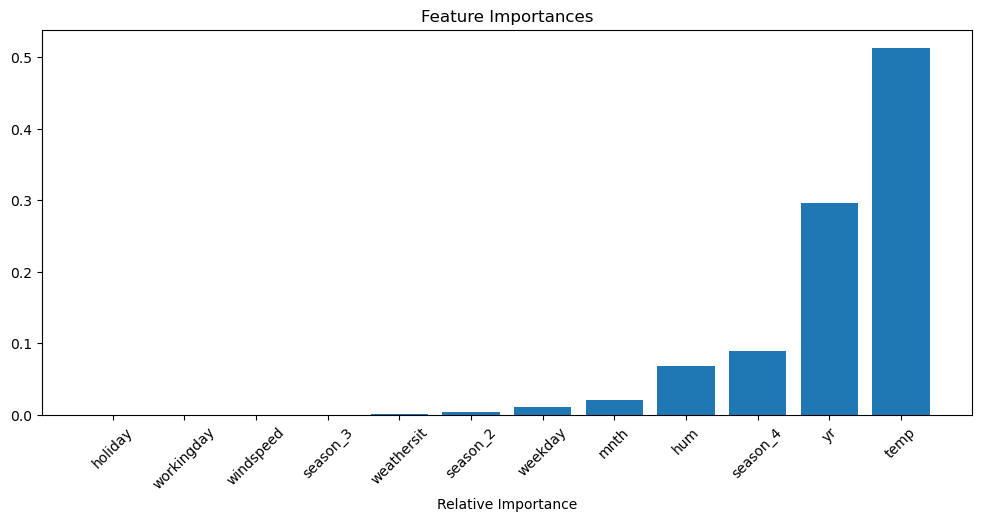

In [115]:
plt.figure(figsize=(12, 5))
plt.title("Feature Importances")
plt.bar(range(len(indices)), importances[indices], align="center")
plt.xticks(range(len(indices)), [X_train.columns[i] for i in indices], rotation = 45)
plt.xlabel("Relative Importance")
plt.show()

In [116]:
def calc_variance(x,y):
    
    #define partition
    temp = df.groupby(x).agg({y:['mean',np.var,'count']}).reset_index()
    
    # drop the level for multilevel index
    temp.columns = temp.columns.droplevel()
    
    #rename the columns
    temp.columns = [x,y+'_mean',y+'_var','count']
    
    #calculate individual porportions for both the levels
    temp['proportions']=temp['count'] / temp['count'].sum()

    #calculate final weight variance
    temp['final_var'] = temp.proportions * temp[y + '_var']
    
    #sum the weight variance and calculate the reduction in variance
    
    return temp.final_var.sum(), (df[y].var() - temp.final_var.sum())

In [117]:
var,reduction_var = calc_variance('yr','cnt')
print(f'Variance for cnt with respect to split on year :{var} and reduction in var:{reduction_var}')

Variance for cnt with respect to split on year :2551035.2846801495 and reduction in var:1201752.923602744


In [118]:
var,reduction_var = calc_variance('yr','cnt')
print(f'Variance for cnt with respect to split on workingday :{var} and reduction in var:{reduction_var}')

Variance for cnt with respect to split on workingday :2551035.2846801495 and reduction in var:1201752.923602744


In [119]:
model = DecisionTreeRegressor()
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [120]:
model.score(X_train,y_train) # rsquare score

1.0

In [121]:
model.score(X_test,y_test) # rsquare score

0.7355359306795279

In [122]:
def adj_r2_score(predictors,targets,predictions):
    r2 = r2_score(targets,predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 -((1 - r2) * (n - 1)/ (n - k - 1))

In [123]:
y_pred = model.predict(X_train)

print("mean absolute error :",mean_absolute_error(y_train,y_pred))
print("mean squared error :",mean_squared_error(y_train,y_pred))
print("root mean squared error :",np.sqrt(mean_squared_error(y_train,y_pred)))

print('r2-score:',r2_score(y_train,y_pred))
print('adj-r2 score:',adj_r2_score(X_train,y_train,y_pred))




mean absolute error : 0.0
mean squared error : 0.0
root mean squared error : 0.0
r2-score: 1.0
adj-r2 score: 1.0


In [124]:
y_pred = model.predict(X_test)
print("mean absolute error :",mean_absolute_error(y_test,y_pred))
print("mean squared error :",mean_squared_error(y_test,y_pred))
print("root mean squared error :",np.sqrt(mean_squared_error(y_test,y_pred)))

print('r2-score:',r2_score(y_test,y_pred))
print('adj-r2 score:',adj_r2_score(X_test,y_test,y_pred))


mean absolute error : 658.2181818181818
mean squared error : 937896.6727272727
root mean squared error : 968.4506558040388
r2-score: 0.7355359306795279
adj-r2 score: 0.7202046802841382


In [125]:
# using random forest

In [81]:
import numpy as np
import pandas as pd
import os
import warnings

# For visualization
import seaborn as sns
from matplotlib import pyplot as plt

# For over sampling and under sampling of data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# For split of the data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Importing models to work with
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

# To evaludate the models
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, classification_report

from sklearn.metrics import fbeta_score, make_scorer
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [82]:
df2 = pd.read_csv('day.csv')
df2.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [83]:
num_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

for i in num_cols:
    fig = px.box(data_frame=df2, y=i, x='holiday')
    fig.show()


In [84]:
num_cols = ['temp','atemp','hum','windspeed','cnt']


for i in num_cols:
    print(i)
    fig=px.box(data_frame=df2,y=i,x='mnth')
    fig.show()

temp


atemp


hum


windspeed


cnt


In [85]:
num_cols = ['temp','atemp','hum','windspeed','cnt']


for i in num_cols:
    print(i)
    fig=px.box(data_frame=df2,y=i,x='weekday',hover_name='workingday')
    fig.show()

temp


atemp


hum


windspeed


cnt


In [86]:
df2.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [87]:
df2.drop(["instant", "dteday", "casual", "registered", "atemp"], axis=1, inplace=True)
df2.head()

season  yr  mnth  holiday  weekday  workingday  weathersit      temp  \
0       1   0     1        0        6           0           2  0.344167   
1       1   0     1        0        0           0           2  0.363478   
2       1   0     1        0        1           1           1  0.196364   
3       1   0     1        0        2           1           1  0.200000   
4       1   0     1        0        3           1           1  0.226957   

        hum  windspeed   cnt  
0  0.805833   0.160446   985  
1  0.696087   0.248539   801  
2  0.437273   0.248309  1349  
3  0.590435   0.160296  1562  
4  0.436957   0.186900  1600

In [88]:
X= df2.drop(['cnt'],axis=1)
Y=df2['cnt']

In [89]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

parameters = {
'criterion' : ['gini', 'entropy'],
'max_features': ['log2', 'sqrt','auto'],
'max_depth': [2, 3, 5, 10, 17],
'min_samples_split': [2, 3, 5, 7, 9],
'min_samples_leaf': [1,5,8,11],
'random_state' : [0,1,2,3,4,5],
'n_estimators' : [50,100],
'max_samples' :[100,350]
}

In [90]:
rf_regressor = RandomForestRegressor(n_estimators=100, 
                                     random_state=42)
rf_regressor.fit(X_train, y_train)




RandomForestRegressor(random_state=42)

In [91]:
y_pred=rf_regressor.predict(X_train)
y_predt=rf_regressor.predict(X_test)

In [92]:
from sklearn.metrics import r2_score

r2_score(y_train,y_pred)

0.9805454480038257

In [93]:
from sklearn.metrics import r2_score

r2_score(y_test,y_predt)

0.8950087945523306

In [94]:
rf_regressor.score(X_test, y_test)

0.8950087945523306

In [95]:
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

def calc_metric_score(X, y_train, y_pred):
    # Error Metrics - low
    print("mean absolute error:",mean_absolute_error(y_train,y_pred))
    print("root mean squared error:",np.sqrt(mean_squared_error(y_train,y_pred)))

    # Accuracy metrics - high
    print("r2-score:",r2_score(y_train,y_pred))
    print("adj-r2 score:", adj_r2_score(X, y_train, y_pred))

In [103]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Choose the type of regressor.
clf = RandomForestRegressor()

# Grid of parameters to choose from
parameters = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2',None]
}


# cv as cross valdidation
# Run the grid search
# verbosity for
_grid_obj = GridSearchCV(clf, parameters, cv=5, verbose = 1)
_grid_obj = _grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
grid_clf = _grid_obj.best_estimator_

print(grid_clf)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
RandomForestRegressor(max_features='log2', n_estimators=200)


In [100]:
grid_clf.fit(X_train,y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=200)

In [101]:
calc_metric_score(X_train, y_train, grid_clf.predict(X_train))

mean absolute error: 176.61567290145985
root mean squared error: 251.1361178507149
r2-score: 0.9829183362221459
adj-r2 score: 0.9826002419246067


In [102]:
calc_metric_score(X_train, y_test, grid_clf.predict(X_test))

mean absolute error: 429.6578642011449
root mean squared error: 628.833289653939
r2-score: 0.8973954140296986
adj-r2 score: 0.8954847141047395


In [104]:
# Choose the type of regressor.
clf = RandomForestRegressor()

# Grid of parameters to choose from
parameters = {  
                'max_depth':[4, 6, 8, 10, None],
                'max_features': ['sqrt','log2',None],
                'n_estimators': [80, 90, 100, 110, 120]
}

# cv as cross valdidation
# Run the grid search
# verbosity for
_rmcv_obj = RandomizedSearchCV(clf, parameters, cv=5, verbose = 1)
_rmcv_obj = _grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rmcv_clf = _rmcv_obj.best_estimator_

print(rmcv_clf)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
RandomForestRegressor(max_depth=20, max_features='sqrt')


In [105]:
rmcv_clf.fit(X_train,y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt')

In [106]:
calc_metric_score(X_train, y_train, rmcv_clf.predict(X_train))

mean absolute error: 182.87671380778588
root mean squared error: 255.68271791940742
r2-score: 0.9822942403395053
adj-r2 score: 0.9819645241447102


In [107]:
calc_metric_score(X_test, y_test, rmcv_clf.predict(X_test))

mean absolute error: 447.3002440801458
root mean squared error: 648.103932033337
r2-score: 0.8910104058000015
adj-r2 score: 0.884673801486048


In [108]:
def adj_r2_score(predictors,targets,predictions):
    r2 = r2_score(targets,predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 -((1 - r2) * (n - 1)/ (n - k - 1))

In [109]:
y_pred = rf_regressor.predict(X_train)

print("mean absolute error :",mean_absolute_error(y_train,y_pred))
print("mean squared error :",mean_squared_error(y_train,y_pred))
print("root mean squared error :",np.sqrt(mean_squared_error(y_train,y_pred)))

print('r2-score:',r2_score(y_train,y_pred))
print('adj-r2 score:',adj_r2_score(X_train,y_train,y_pred))


mean absolute error : 183.4946897810219
mean squared error : 71830.58739762775
root mean squared error : 268.01228963916515
r2-score: 0.9805454480038257
adj-r2 score: 0.980183165843748


In [110]:
y_pred = rf_regressor.predict(X_test)
print("mean absolute error :",mean_absolute_error(y_test,y_pred))
print("mean squared error :",mean_squared_error(y_test,y_pred))
print("root mean squared error :",np.sqrt(mean_squared_error(y_test,y_pred)))

print('r2-score:',r2_score(y_test,y_pred))
print('adj-r2 score:',adj_r2_score(X_test,y_test,y_pred))


mean absolute error : 413.7631693989071
mean squared error : 404629.18021311477
root mean squared error : 636.1046928085932
r2-score: 0.8950087945523306
adj-r2 score: 0.8889046547007219


In [111]:
gb_tuned0 = GradientBoostingRegressor(random_state=1)

# Grid of parameters to choose from
gb_tuned0.fit(X_train,y_train)

scorer = metrics.make_scorer(metrics.recall_score)


In [112]:
gb_tuned0.fit(X_train, y_train)


GradientBoostingRegressor(random_state=1)

In [118]:
y_pred1=gb_tuned0.predict(X_train)
y_pred2=gb_tuned0.predict(X_test)

In [119]:
gb_tuned0.score(X_test, y_test)

0.9005608392286105

In [120]:
r2_score(y_train,y_pred1)

0.9508964456407231

In [121]:
r2_score(y_test,y_pred2)

0.9005608392286105

In [122]:
gb_tuned0.score(X_test, y_test)

0.9005608392286105